In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Final_Project_DS29/Dataset/pizza_v2.csv'
pizza_data = pd.read_csv('/content/drive/MyDrive/Final_Project_DS29/Dataset/pizza_v2.csv')

# Display the first few rows of the dataset
pizza_data.head()

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
# Convert price_cad and diameter to numeric
pizza_data['price_cad'] = pd.to_numeric(pizza_data['price_cad'].str.replace('$', ''), errors='coerce')
pizza_data['diameter'] = pd.to_numeric(pizza_data['diameter'].str.replace(' inch', ''), errors='coerce')

# Check for missing values in the dataset
missing_values = pizza_data.isnull().sum()

# Check data types of each column
data_types = pizza_data.dtypes

missing_values, data_types

<ipython-input-4-8a0881e78a03>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pizza_data['price_cad'] = pd.to_numeric(pizza_data['price_cad'].str.replace('$', ''), errors='coerce')


(company            0
 price_cad          0
 diameter           0
 topping            0
 variant            0
 size               0
 extra_sauce        0
 extra_cheese       0
 extra_mushrooms    0
 dtype: int64,
 company             object
 price_cad            int64
 diameter           float64
 topping             object
 variant             object
 size                object
 extra_sauce         object
 extra_cheese        object
 extra_mushrooms     object
 dtype: object)

In [5]:
# Descriptive statistics for numerical columns
numerical_desc = pizza_data[['price_cad', 'diameter']].describe()

# Frequency of each category in categorical columns
categorical_columns = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese', 'extra_mushrooms']
categorical_freq = pizza_data[categorical_columns].apply(lambda x: x.value_counts()).T.stack()

numerical_desc, categorical_freq

(        price_cad    diameter
 count  129.000000  129.000000
 mean    15.604651   12.976744
 std      3.975351    3.272674
 min     10.000000    8.000000
 25%     12.000000   12.000000
 50%     15.000000   12.000000
 75%     17.000000   14.000000
 max     30.000000   22.000000,
 company          A                    25.0
                  B                    24.0
                  C                    30.0
                  D                    20.0
                  E                    30.0
 topping          beef                  3.0
                  black_papper          3.0
                  chicken              29.0
                  meat                  8.0
                  mozzarella           21.0
                  mushrooms            22.0
                  onion                 1.0
                  papperoni             2.0
                  sausage               3.0
                  smoked_beef          19.0
                  tuna                  9.0
                

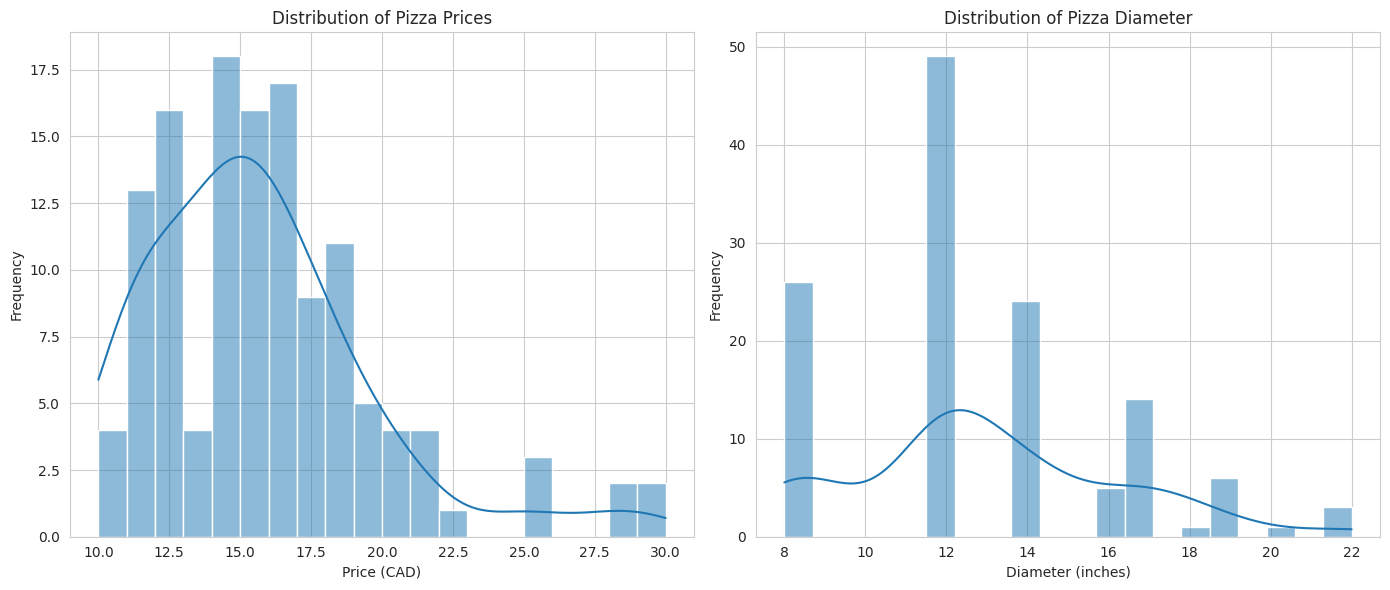

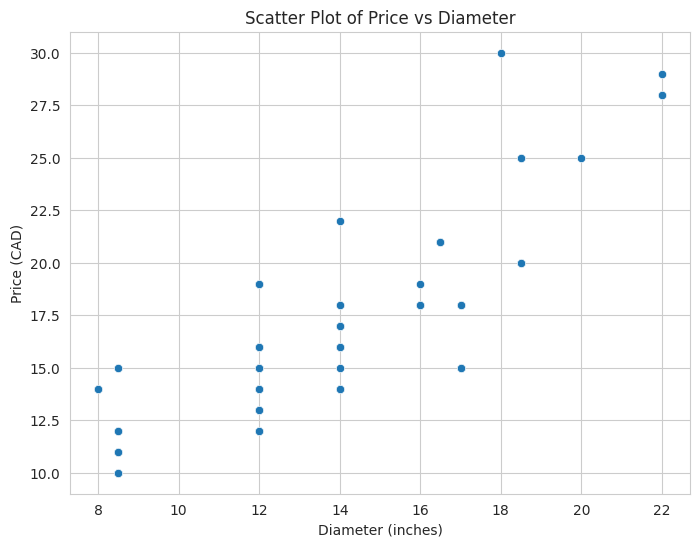

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot the distribution of price
plt.subplot(1, 2, 1)
sns.histplot(pizza_data['price_cad'], bins=20, kde=True)
plt.title('Distribution of Pizza Prices')
plt.xlabel('Price (CAD)')
plt.ylabel('Frequency')

# Plot the distribution of diameter
plt.subplot(1, 2, 2)
sns.histplot(pizza_data['diameter'], bins=20, kde=True)
plt.title('Distribution of Pizza Diameter')
plt.xlabel('Diameter (inches)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot of price vs diameter
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pizza_data['diameter'], y=pizza_data['price_cad'])
plt.title('Scatter Plot of Price vs Diameter')
plt.xlabel('Diameter (inches)')
plt.ylabel('Price (CAD)')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from lightgbm import LGBMRegressor

# Extract features (X) and target (y) variables
X = pizza_data[['diameter']]
y = pizza_data['price_cad']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')


# Train models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions
linear_preds = linear_model.predict(X_test)
lasso_preds = lasso_model.predict(X_test)
ridge_preds = ridge_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Calculate RMSE for each model
linear_rmse = mean_squared_error(y_test, linear_preds, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_preds, squared=False)
ridge_rmse = mean_squared_error(y_test, ridge_preds, squared=False)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)

linear_rmse, lasso_rmse, ridge_rmse, xgb_rmse

(2.7806242390294966,
 2.8483412805729285,
 2.7810584821327753,
 2.3051466404887644)

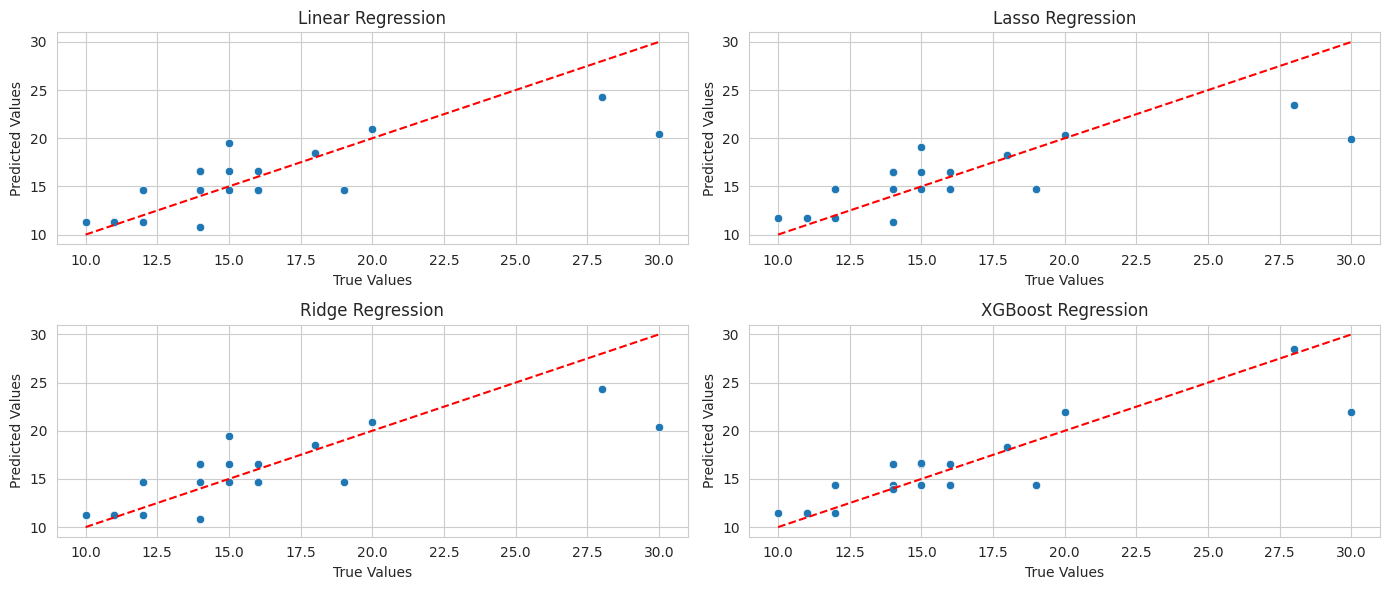

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot the true values vs predicted values for each model
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=linear_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=lasso_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Lasso Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test, y=ridge_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Ridge Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 4)
sns.scatterplot(x=y_test, y=xgb_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('XGBoost Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()